<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.판다스 시작하기

## 4.1 빅데이터를 위한 판다스

- 구글드라이브에 연결하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 판다스로 파일 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/gapminder.tsv' , sep = "\t")

파일 확인

In [ ]:
print(type(df))
print(df.shape)   # 행, 열 갯수 확인

In [ ]:
print(df.columns)

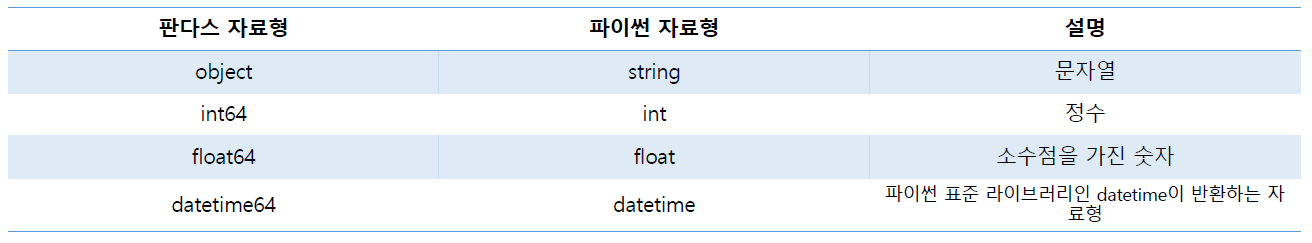

In [ ]:
print(df.dtypes)     # 각 열 자료형 확인

In [ ]:
print(df.info())  # null 값 확인

## 4.2 데이터 추출하기

- 데이터프레임에서 데이터 열단위로 추출하기

In [ ]:
country_df = df['country']
print(type(country_df))
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


여러 열 한번에 불러오기 

In [ ]:
subset = df[['country', 'continent', 'year']] # 리스트 안에 열 이름 넣어서 불러오기
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


- 데이터프레임에서 데이터 행단위로 추출오기 ( loc 사용)

In [ ]:
print(df.loc[0])
print()
print(df.loc[99])
print()
print(df.tail(1)) # 마지막 행

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


여러 행 한번에 불러오기

In [ ]:
print(df.loc[[0,9,99,111]])   # 리스트 안에 여러 인덱스 번호 넣어서 한번에 추출하기

         country continent  year  lifeExp       pop     gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333    779.445314
9    Afghanistan      Asia  1997   41.763  22227415    635.341351
99    Bangladesh      Asia  1967   43.453  62821884    721.186086
111      Belgium    Europe  1967   70.940   9556500  13149.041190


> loc 속성과 head,tail 메서드가 반환하는 자료형은 서로 다르다

> loc 속성이 반환한 데이터 자료형은 시리즈이고, head 나 tail 메서드가 반환한 데이터 자료형은 데이터프레임

In [ ]:
subset_loc = df.loc[0]
subset_head = df.head(1)
subset_tail = df.tail(1)


print(type(subset_loc))
print(type(subset_head))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


- 데이터프레임에서 데이터 행단위로 추출오기 ( iloc 사용)

> loc 속성은 데이터프레임의 인덱스를 사용 하여 데이터를 추출했지만, iloc 속성은 데이터 순서를 의미하는 행 번호를 사용하여 데이터를 추출

In [ ]:
print(df.iloc[1])
print()
print(df.iloc[-1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [ ]:
print(df.iloc[[0,9,99,111]])   # 리스트 안에 여러 행번호 넣어서 한번에 추출하기

         country continent  year  lifeExp       pop     gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333    779.445314
9    Afghanistan      Asia  1997   41.763  22227415    635.341351
99    Bangladesh      Asia  1967   43.453  62821884    721.186086
111      Belgium    Europe  1967   70.940   9556500  13149.041190


- 슬라이싱 구문으로 데이터 추출하기

In [ ]:
subset = df.loc[:,['year','pop']]   # : 는 전체 행
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [ ]:
subset = df.iloc[:,[2,4,-1]]
print(subset.head())

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


- range 메서드로 데이터 추출하기
> range 메서드는 지정한 범위의 정수 리스트를 반환하는 것이 아니라 제네레이터를 반환

In [ ]:
small_range = list(range(3,6))
print(small_range)

subset= df.iloc[small_range]
print(subset.head)

[3, 4, 5]
<bound method NDFrame.head of        country continent  year  lifeExp       pop   gdpPercap
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360>


In [ ]:
subset= df.iloc[small_range]
print(subset.head)

<bound method NDFrame.head of        country continent  year  lifeExp       pop   gdpPercap
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360>


In [ ]:
subset = df.iloc[:, list(range(0,6,2))]  # 0부터 5까지 2만큼 건너뛰는 제네레이터 생성
print(subset.head())

subset1 = df.iloc[:, [0,2,4]]
print(subset1.head())

subset2 = df.iloc[:,0:6:2]
print(subset2.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


iloc 속성으로 원하는 행,열 추출

In [ ]:
print(df.iloc[[0, 99, 999],[0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


> iloc는 나중에 어떤 데이터를 추출하기
위한 코드인지 파악하지 못 할 수도 있다.
그래서 보통은 loc 속성을 이용하여 열 지정값으로 열 이름을 전달

큰 규모의 데이터 분석 프로젝트에서는 loc 속성이 좀 더 유용하게 사용

In [ ]:
print(df.loc[[0, 99, 999],['country', 'lifeExp', 'gdpPercap']])

print(df.loc[10:13,['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


## 4.3 groupby

1. 그룹화한 데이터의 평균 구하기
> - lifeExp 열을 연도별로 그룹화하여 평균 계산하기

In [ ]:
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


> - lifeExp, gdpPercap 열의 평균값을 연도 , 지역별로 그룹화하여 한번에 계산하기

In [ ]:
multi_group_var = df.groupby(['year','continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


2. 그룹화한 데이터 개수 세기
> continent 를 기준으로 데이터프레임을 만들고 country 열만 추출하여 데이터의
빈도수를 계산

In [ ]:
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


## 4.3 시각화, 빅데이터를 이해하는 방법

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


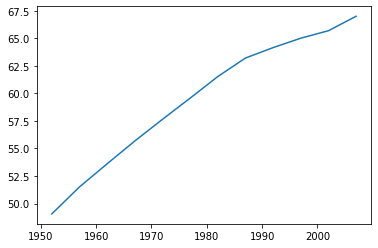

In [ ]:
import matplotlib.pyplot as plt
df1 = df.groupby('year')['lifeExp'].mean()
print(df1)

plt.plot(df1)

# 5.판다스 데이터프레임과 시리즈

## 5.1 Series, Dataframe 만들기

- Series 만들기
> 판다스의 Series 메서드에 리스트를 전달하여 시리즈를 생성

In [ ]:
import pandas as pd
s =  pd.Series(['banana', 42])
print(s)

0    banana
1        42
dtype: object


In [ ]:
s = pd.Series(['Wes Mckinney', 'creator of Pandas'], index = ['Person', 'who'])   # 인덱스 지정하기
print(s)

Person         Wes Mckinney
who       creator of Pandas
dtype: object


- dataframe 만들기
> 딕셔너리를 DataFrame 클래스에 전달

In [ ]:
scientists = pd.DataFrame({
    'Name' : ['Geoffrey Everest Hinton', 'Marvin Lee Minsky'],
    'Occupation':['pioneer in Ai','pioneer in A.I'],
    'Born':['1947-12-06','1927-08-09'],
    'Died':['_','2016-01-24'],
    'Age' : [73, 78]
})
print (scientists)

                      Name      Occupation        Born        Died  Age
0  Geoffrey Everest Hinton   pioneer in Ai  1947-12-06           _   73
1        Marvin Lee Minsky  pioneer in A.I  1927-08-09  2016-01-24   78


In [ ]:
scientists = pd.DataFrame(
    data = {'Occupation':['pioneer in Ai','pioneer in A.I'],
            'Born':['1947-12-06','1927-08-09'],
            'Died':['_','2016-01-24'],
            'Age' : [73, 78]},
    index = ['Geoffrey Everest Hinton', 'Marvin Lee Minsky'], # 인덱스 지정
    columns = ['Occupation', 'Born', 'Age', 'Died'])          # 열 순서 지정

print (scientists)

                             Occupation        Born  Age        Died
Geoffrey Everest Hinton   pioneer in Ai  1947-12-06   73           _
Marvin Lee Minsky        pioneer in A.I  1927-08-09   78  2016-01-24


## 5.2 Series 다루기 - 기초편

- 데이터프레임에서 시리즈 선택하기

In [ ]:
scientists = pd.DataFrame(
    data = {'Occupation':['pioneer in Ai','pioneer in A.I'],
            'Born':['1947-12-06','1927-08-09'],
            'Died':['_','2016-01-24'],
            'Age' : [73, 78]},
    index = ['Geoffrey Everest Hinton', 'Marvin Lee Minsky'], # 인덱스 지정
    columns = ['Occupation', 'Born', 'Age', 'Died'])          # 열 순서 지정

print (scientists)

                             Occupation        Born  Age        Died
Geoffrey Everest Hinton   pioneer in Ai  1947-12-06   73           _
Marvin Lee Minsky        pioneer in A.I  1927-08-09   78  2016-01-24


In [ ]:
first_row = scientists.loc['Geoffrey Everest Hinton']
print(type(first_row))

print(first_row)          # 자료형 : Object

<class 'pandas.core.series.Series'>
Occupation    pioneer in Ai
Born             1947-12-06
Age                      73
Died                      _
Name: Geoffrey Everest Hinton, dtype: object


- 시리즈 속성과 메서드 사용하기
> index, values, keys

1. index 속성 사용하기

In [ ]:
print(first_row.index)
print(first_row.index[0])

Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')
Occupation


2. values 속성 사용하기

In [ ]:
print(first_row.values)

['pioneer in Ai' '1947-12-06' 73 '_']


3. Key 메서드 사용하기

In [ ]:
print(first_row.keys())   # index 속성과 같은 역할
print(first_row.keys()[0])

Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')
Occupation


4. 시리즈에 미리 정의되어 있는 mean, min, max, std 메서드의 사용 방법

In [ ]:
ages = scientists['Age']
print(ages)
print()
print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())

Geoffrey Everest Hinton    73
Marvin Lee Minsky          78
Name: Age, dtype: int64

75.5
73
78
3.5355339059327378


## 5.3 Series 다루기 - 응용편

- 불린 추출 : 특정 조건을 만족하는 값만 추출

In [ ]:
scientists = pd.read_csv('/content/drive/MyDrive/dataset/scientists.csv')

ages = scientists['Age']
print(ages.max())
print(ages.min())

print()

print(ages[ages> ages.mean()])
print()
print(ages> ages.mean())

90
37

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


브로드캐스팅(Broadcasting) : 시리즈나 데이터프레임에 있는 모든 데이터에 대해 한 번에 연산하는 것

## 5.4 데이터프레임 다루기

In [ ]:
# 1. 불린 추출하기
print(scientists[scientists['Age'] > scientists['Age'].mean()])

# 2. 브로드캐스팅하기
print(scientists * 2)  # 정수는 곱하기 2, 문자열은 2번 반복

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician
                                       Name  ...                            Occupation
0        Rosaline FranklinRosaline Franklin  ...                        ChemistChemist
1              William GossetWilliam Gosset  ...              StatisticianStatistician
2  Florence NightingaleFlorence Nightingale  ...                            NurseNurse
3                    Marie CurieMarie Curie  ...                        ChemistChemist
4                Rachel CarsonRachel Carson  ...                    BiologistBiologist
5                        John SnowJohn Snow  ...                    PhysicianPhysician
6                    Alan TuringAlan Turing  ...  C

## 5.5 시리즈와 데이터프레임의 데이터 처리하기

데이터프레임에서 열 삭제

In [ ]:
scientists_dropped = scientists.drop(['Age'], axis = 1)
print(scientists_dropped.columns)

Index(['Name', 'Born', 'Died', 'Occupation'], dtype='object')


## 5.6 데이터 저장하고 불러오기

In [ ]:
names = scientists['Name']
names.to_csv('/content/drive/MyDrive/dataset/testcsv.csv')                   # csv 파일로 저장하기
scientists.to_csv('/content/drive/MyDrive/dataset/testtsv.tsv' , sep = 't')  # tsv 파일로 저장하기

import xlwt
import openpyxl

names_df = names.to_frame()

names_df.to_excel('/content/drive/MyDrive/dataset/testxls.xls')  # xls 파일로 저장하기
names_df.to_excel('/content/drive/MyDrive/dataset/testxlsx.xlsx') # xlsx 파일로 저장하기